In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Задание 1
Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

# Описание DataFrame

Эти данные являются результатами химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. Анализ определил количество 13 компонентов, обнаруженных в каждом из трех типов вин.

## Атрибуты
- Алкоголь
- Яблочная кислота
- Зола
- Щелочность золы
- Магний
- Общие фенолы
- Флавоноиды
- Нефлаваноидные фенолы
- Проантоцианы
- Интенсивность цвета
- Оттенок
- OD280/OD315 разбавленных вин
- Пролин

In [2]:
cols_name = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',\
             'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',\
             'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [3]:
df_wine = pd.read_csv('../data/wine.data.csv', header=None)
df_wine.columns = cols_name
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## Задание 2
Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
df_wine.drop_duplicates(inplace=True)

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## Задание 3
Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:>

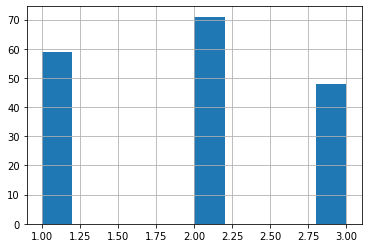

In [5]:
df_wine['Type'].hist()

Данные сбалансированны

## Задание 4
Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Type'),
  Text(2, 0, 'Alcohol'),
  Text(3, 0, 'Malic acid'),
  Text(4, 0, 'Ash'),
  Text(5, 0, 'Alcalinity of ash'),
  Text(6, 0, 'Magnesium'),
  Text(7, 0, 'Total phenols'),
  Text(8, 0, 'Flavanoids'),
  Text(9, 0, 'Nonflavanoid phenols'),
  Text(10, 0, 'Proanthocyanins'),
  Text(11, 0, 'Color intensity'),
  Text(12, 0, 'Hue'),
  Text(13, 0, 'OD280/OD315 of diluted wines'),
  Text(14, 0, 'Proline')])

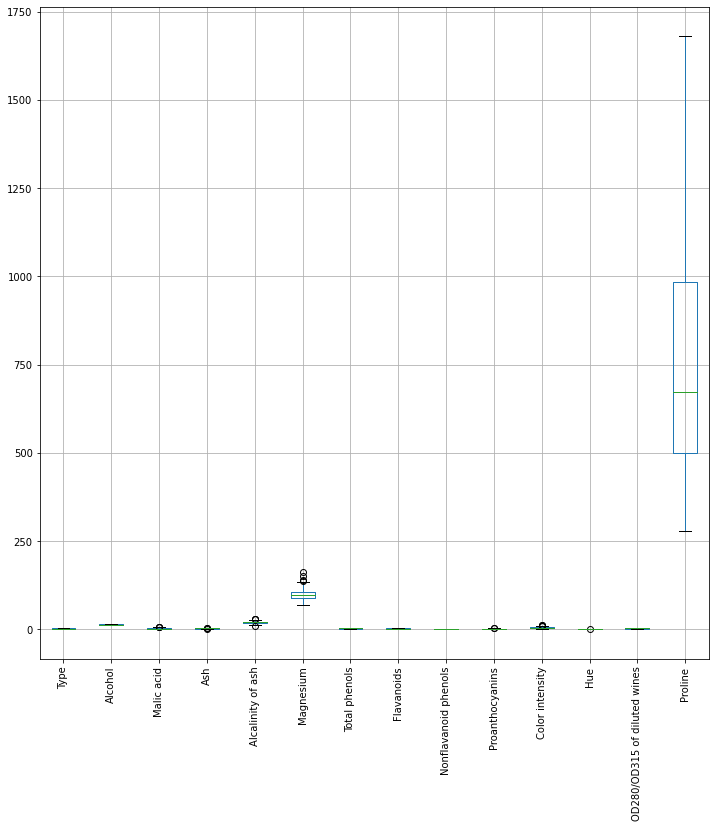

In [6]:
rcParams['figure.figsize'] = 12, 12
df_wine.boxplot()
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malic acid'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Alcalinity of ash'),
  Text(5, 0, 'Magnesium'),
  Text(6, 0, 'Total phenols'),
  Text(7, 0, 'Flavanoids'),
  Text(8, 0, 'Nonflavanoid phenols'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Color intensity'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'OD280/OD315 of diluted wines'),
  Text(13, 0, 'Proline'),
  Text(14, 0, 'Type')])

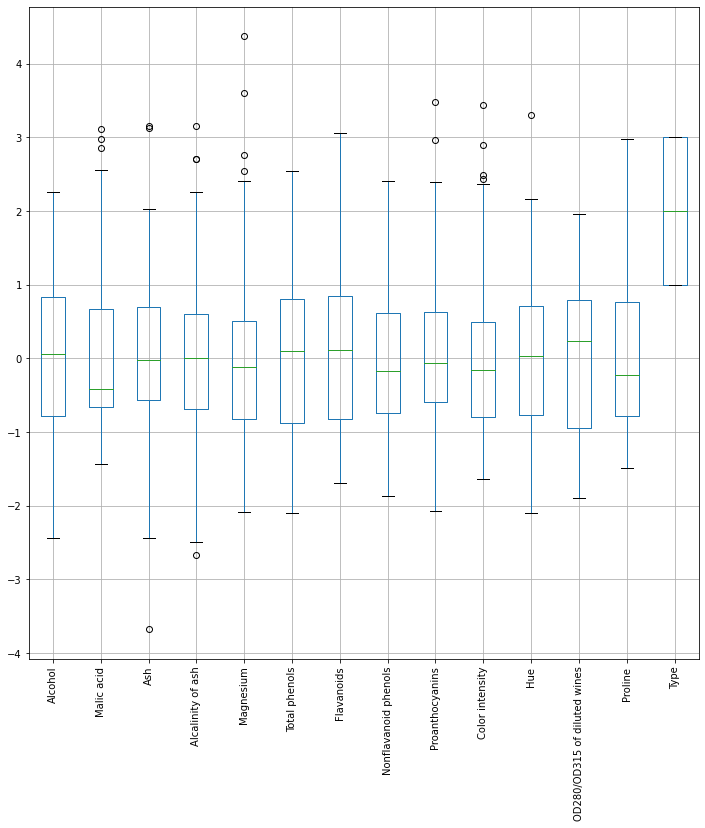

In [7]:
scaler = StandardScaler()

df_wine_scaled = scaler.fit_transform(df_wine[cols_name[1:]])
df_wine_scaled = pd.DataFrame(df_wine_scaled, columns=df_wine.columns[1:])


df_wine_scaled['Type'] = df_wine.Type
df_wine_scaled.boxplot()
plt.xticks(rotation=90)

## Задание 6
Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

In [17]:
for name, val in zip(df_wine_scaled.columns, df_wine_scaled.corr()['Type']):
    print(f"{name:<30}: ", end='')
    print(f'{val:>10.6f}') if abs(val) > 0.25 else print('weak corr!!!')

Alcohol                       :  -0.328222
Malic acid                    :   0.437776
Ash                           : weak corr!!!
Alcalinity of ash             :   0.517859
Magnesium                     : weak corr!!!
Total phenols                 :  -0.719163
Flavanoids                    :  -0.847498
Nonflavanoid phenols          :   0.489109
Proanthocyanins               :  -0.499130
Color intensity               :   0.265668
Hue                           :  -0.617369
OD280/OD315 of diluted wines  :  -0.788230
Proline                       :  -0.633717
Type                          :   1.000000


Данные столбцов 'Ash' и 'Magnesium' плохо коррелируют с целевой переменной 'Type'

In [19]:
df_wine_scaled_lin = df_wine_scaled.drop(axis=0, columns=['Ash', 'Magnesium'])
df_wine_scaled_lin

,Alcohol,Malic acid,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Type
0,1.518613,-0.562250,-1.169593,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-2.490847,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,-0.268738,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,-0.809251,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,0.451946,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.301803,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,1.052516,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,0.151661,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.151661,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


## Задание 8
Решите поставленную задачу классификации в соответствии с заданием. 

In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

### Подготовка данных

In [11]:
# разделим полученные данные на данные для обучения и теста
X = np.array(df_wine_scaled_lin.drop('Type', axis=1))
y = np.array(df_wine_scaled_lin['Type']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### KNeighborsClassifier

In [31]:
knc = KNeighborsClassifier()
params = {
    'n_neighbors': range(5, 12),
}

knc_grid = GridSearchCV(knc, param_grid=params)
knc_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 12)})

In [24]:
best_nieghbors = knc_grid.best_estimator_.n_neighbors
best_score = knc_grid.best_score_
print(f'best train score: {best_score:.4f}\t at neighbors: {best_nieghbors}')

best train score: 0.9513	 at neighbors: 8


In [25]:
knc = KNeighborsClassifier(n_neighbors=best_nieghbors)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [26]:
print(f'Точность на test: {accuracy_score(y_test, knc.predict(X_test)):.5f}')
print(f'Точность на train: {accuracy_score(y_train, knc.predict(X_train)):.5f}')

Точность на test: 0.94444
Точность на train: 0.96774


Значения незначительно различаются (Предсказание на train немного больше чем на test)

### Perceptron

In [41]:
per = Perceptron()
params = {
    'alpha' : np.arange(0.00001, 0.001, 0.00005)
}

per_grid = GridSearchCV(per, param_grid=params)
per_grid.fit(X_train, y_train)

GridSearchCV(estimator=Perceptron(),
             param_grid={'alpha': array([1.0e-05, 6.0e-05, 1.1e-04, 1.6e-04, 2.1e-04, 2.6e-04, 3.1e-04,
       3.6e-04, 4.1e-04, 4.6e-04, 5.1e-04, 5.6e-04, 6.1e-04, 6.6e-04,
       7.1e-04, 7.6e-04, 8.1e-04, 8.6e-04, 9.1e-04, 9.6e-04])})

In [44]:
best_alpha = per_grid.best_estimator_.alpha
best_score = per_grid.best_score_

print(f'best train score: {best_score:.4f}\t at alpha: {best_alpha}')

best train score: 0.9517	 at alpha: 1e-05


In [45]:
per = Perceptron(alpha=best_alpha)
per.fit(X_train, y_train)

Perceptron(alpha=1e-05)

In [46]:
print(f'Точность на test: {accuracy_score(y_test, per.predict(X_test)):.5f}')
print(f'Точность на train: {accuracy_score(y_train, per.predict(X_train)):.5f}')

Точность на test: 0.98148
Точность на train: 0.99194


Видно, что точность предсказания на train несильно отличается от test, что говорит об отсутсвии переобучения

## Задание 9
Сравните кривые для классификаторов, указанных в задании, сделайте выводы